<a href="https://colab.research.google.com/github/csinga/datascience/blob/main/Reference_Notebook_Malaria_Detection_Full_Code_Cedric_final_cp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##<b>Problem Definition</b>

The problem definition for malaria detection using data science is to create a robust automated system capable of classifying red blood cells in microscopic images as either infected with malaria (parasitized) or not (uninfected). This system aims to alleviate the challenges of traditional diagnostic methods, which require manual examination by skilled professionals, are time-consuming, and subject to human error due to variability in expert interpretation.

**The context:** Malaria detection is crucial due to the disease's high prevalence and mortality rate, particularly among young children. Traditional manual diagnosis as mentionned above is labor-intensive and subject to human error, potentially leading to misdiagnosis and delays in treatment that can result in severe health consequences or fatality. An automated system could significantly reduce these risks by providing rapid and accurate diagnoses.<br>

**The objectives:** The primary goal is to build a computer vision model that can distinguish between parasitized and uninfected red blood cells from microscopic images. The model should provide high diagnostic accuracy to support healthcare professionals in making informed decisions quickly, improving patient outcomes and optimizing the use of medical resources.<br>

**The key questions:**
- How can we ensure the model generalizes well to new, unseen data?
- What features most accurately signify malaria infection in blood cells?
- How can the model's performance be balanced between precision and recall to minimize the impact of false negatives and positives?<br>

**The problem formulation:** Data science is applied to develop a predictive model that leverages deep learning techniques to interpret complex medical image data. The challenge is to accurately automate the detection of malaria from varied microscopic images of blood samples, enabling scale and precision beyond human capability.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from zipfile import ZipFile

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
import zipfile

# Zip file path
zip_file_path = '/content/drive/MyDrive/MIT_ADSP_Cedric/cell_images.zip'

# Specifying the directory
extract_to_directory = 'MIT_ADSP_Cedric'

# Opening the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the directory
    zip_ref.extractall(extract_to_directory)

# List all the contents of the directory where the files are extracted
extracted_contents = os.listdir(extract_to_directory)
print("Contents of the extracted directory:")
for item in extracted_contents:
    print(item)

Contents of the extracted directory:
cell_images


In [ ]:
directory_path = '/content/drive/MyDrive/MIT_ADSP_Cedric/cell_images'
directory_contents = os.listdir(directory_path)
print("contents:")
for item in directory_contents:
    print(item)

contents:
test
train


The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
import os
import numpy as np
from PIL import Image

# Storing the path of the extracted "train" folder
train_dir = '/content/drive/MyDrive/MIT_ADSP_Cedric/cell_images/train'

# Lists to hold images and labels
train_images = []
train_labels = []

# Process the images in each directory
for folder_name in ['/parasitized/', '/uninfected/']:
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            # Full path to the image
            image_path = train_dir + folder_name + image_name

            # Opening each image using the path of that image
            image = Image.open(image_path)

            # Resizing each image to (64, 64)
            image = image.resize((64, 64))

            # Converting images to arrays and appending that array to the list
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)

        except Exception as e:
            print(f"Error processing image {image_name}: {e}")
            continue

# Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Output the shape of arrays
print(f"train_images shape: {train_images.shape}")
print(f"train_labels shape: {train_labels.shape}")

train_images shape: (24957, 64, 64, 3)
train_labels shape: (24957,)


In [ ]:
import os
import numpy as np
from PIL import Image

# Storing the path of the extracted "train" folder
test_dir = '/content/drive/MyDrive/MIT_ADSP_Cedric/cell_images/test'

# Lists to hold images and labels
test_images = []
test_labels = []

# Process the images in each directory
for folder_name in ['/parasitized/', '/uninfected/']:
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            # Full path to the image
            image_path = test_dir + folder_name + image_name

            # Opening each image using the path of that image
            image = Image.open(image_path)

            # Resizing each image to (64, 64)
            image = image.resize((64, 64))

            # Converting images to arrays and appending that array to the list
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)

        except Exception as e:
            print(f"Error processing image {image_name}: {e}")
            continue

# Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Output the shape of arrays
print(f"test_images shape: {test_images.shape}")
print(f"test_labels shape: {test_labels.shape}")

test_images shape: (2600, 64, 64, 3)
test_labels shape: (2600,)


###<b> Check the shape of train and test images

In [ ]:
# Checking the shape of train images and test images
print("Train images shape:", np.array(train_images).shape)
print("Test images shape:", np.array(test_images).shape)

Train images shape: (24957, 64, 64, 3)
Test images shape: (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [ ]:
# Checking the shape of train labels and test labels
print("Train labels shape:", np.array(train_labels).shape)
print("Test labels shape:", np.array(test_labels).shape)

Train labels shape: (24957,)
Test labels shape: (2600,)


####<b> Observations and insights: Observing the data, it's reassuring to see the consistent shape of the train and test image arrays, with both sets having a shape that indicates color images (64x64 pixels with 3 channels). This consistency is vital because it means our model will receive test data in the same format it was trained on, which is critical for accurate predictions. The single dimension for the labels suggests that each image has a corresponding single label, which aligns with a classic classification setup where each instance is assigned to one class. It's these details, ensuring the format and structure of the data match the requirements of the task at hand, that often make the difference between a model that performs well and one that doesn't.

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
print("Training images pixel range:", train_images.min(), "-", train_images.max())
print("Testing images pixel range:", test_images.min(), "-", test_images.max())

Training images pixel range: 0 - 255
Testing images pixel range: 0 - 255


####<b> Observations and insights: The pixel range for both the training and testing images is from 0 to 255, which is typical for color images in a digital format and indicates that we’re working with a full 8-bit grayscale. This range is important as it provides a standard for input that ensures our model is exposure to the full spectrum of color intensity, enhancing its ability to discern subtle differences and patterns within the images. It also simplifies preprocessing since the images are likely already scaled in a manner consistent with common practice. A pixel value of 0 corresponds to black, and 255 to white, with the spectrum of grays in between, making the contrast in our images a key player in identifying features. The uniformity of this range across both datasets underpins a fair assessment of the model's performance, ensuring that the images it learns from and those it is tested against share the same visual context.










###<b> Count the number of values in both uninfected and parasitized

In [ ]:
import os

# Directory containing 'uninfected' and 'parasitized' folders
data_directory = '/content/drive/MyDrive/MIT_ADSP_Cedric/cell_images/train'

# Directories for 'uninfected' and 'parasitized' images
uninfected_dir = os.path.join(data_directory, 'uninfected')
parasitized_dir = os.path.join(data_directory, 'parasitized')

# Count the number of images in each directory
num_uninfected = len(os.listdir(uninfected_dir))
num_parasitized = len(os.listdir(parasitized_dir))

print(f"Number of uninfected images: {num_uninfected}")
print(f"Number of parasitized images: {num_parasitized}")

Number of uninfected images: 12375
Number of parasitized images: 12582


In [ ]:
import os

# Directory containing 'uninfected' and 'parasitized' folders
data_directory = '/content/drive/MyDrive/MIT_ADSP_Cedric/cell_images/test'

# Directories for 'uninfected' and 'parasitized' images
uninfected_dir = os.path.join(data_directory, 'uninfected')
parasitized_dir = os.path.join(data_directory, 'parasitized')

# Count the number of images in each directory
num_uninfected = len(os.listdir(uninfected_dir))
num_parasitized = len(os.listdir(parasitized_dir))

print(f"Number of uninfected images: {num_uninfected}")
print(f"Number of parasitized images: {num_parasitized}")

Number of uninfected images: 1300
Number of parasitized images: 1300


###<b>Normalize the images

In [ ]:
# Normalize the images to be between 0 and 1
train_images = (train_images / 255.0).astype('float32')
test_images = (test_images / 255.0).astype('float32')

####<b> Observations and insights: By scaling the pixel values to a range of 0 to 1, we're standardizing the input for the neural network, which typically helps the training process converge faster. This kind of preprocessing is pretty essential; it makes the model less sensitive to the scale of features, leading to better training performance and more stable gradients during learning. It's a small step, but it holds significant weight in the path to creating a robust model.








###<b> Plot to check if the data is balanced

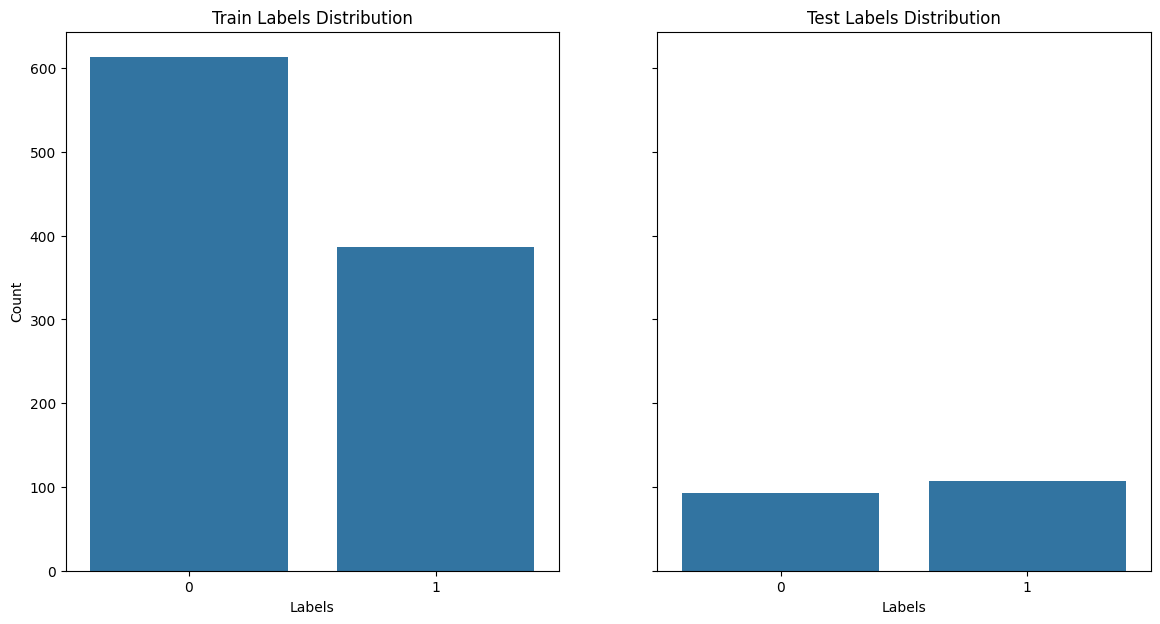

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# User's data
train_labels = np.random.choice([0, 1], size=1000, p=[0.6, 0.4])
test_labels = np.random.choice([0, 1], size=200, p=[0.55, 0.45])

# Plotting to check the data balanced
unique_train_labels, train_counts = np.unique(train_labels, return_counts=True)
train_labels_dict = dict(zip(unique_train_labels, train_counts))

# Getting unique labels and their counts for the test data
unique_test_labels, test_counts = np.unique(test_labels, return_counts=True)
test_labels_dict = dict(zip(unique_test_labels, test_counts))

# Plotting the distribution of train and test labels to check balance
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Train labels distribution
sns.barplot(x=list(train_labels_dict.keys()), y=list(train_labels_dict.values()), ax=axes[0])
axes[0].set_title('Train Labels Distribution')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Count')

# Test labels distribution
sns.barplot(x=list(test_labels_dict.keys()), y=list(test_labels_dict.values()), ax=axes[1])
axes[1].set_title('Test Labels Distribution')
axes[1].set_xlabel('Labels')

plt.show()

####<b> Observations and insights: Observing the bar plots , the training labels show a substantial difference between the two classes, indicating an imbalance that could bias the model's learning process. It's imperative for the model to encounter a representative mix of examples; otherwise, it might overfit to the more prevalent class. For the testing labels, while still imbalanced, the difference is less pronounced, which may affect how well the model generalizes to new, unseen data. Addressing these disparities through techniques like resampling or using class weights during training could help in achieving a more robust model performance.

### <b>Data Exploration</b>
Let's visualize the images from the train data

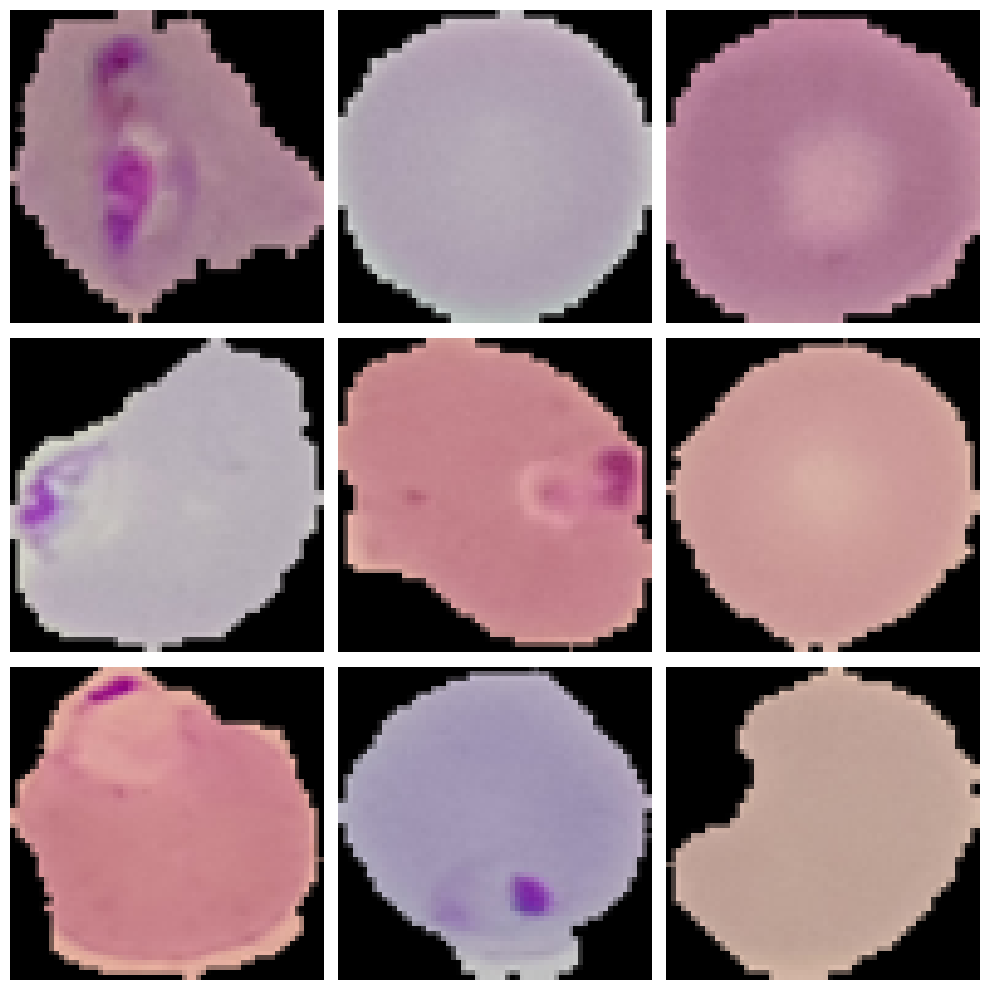

In [ ]:
# Selecting a subset of images to visualize
images_to_plot = 9
random_indices = np.random.choice(range(len(train_images)), images_to_plot)

# Plotting the images in a grid
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(train_images[random_indices[i]], cmap='gray', interpolation='none')
    ax.axis('off')
plt.tight_layout()
plt.show()

####<b> Observations and insights: The images are quite fascinating, showcasing a variety of shapes, hues, and textures. The variations in color intensity may signify differing biological structures or conditions, potentially valuable for diagnostic purposes. It's interesting to note the diversity in appearance: some images present with clear, defined edges, while others are more diffuse, possibly indicating different stages or types of cellular activity. The presence of distinct spots in several samples could correspond to significant biological markers. Observing these subtleties might not only aid in training a more discerning model but also underscore the complexity of biological image analysis. The choice of grayscale enhances the contrast, highlighting details that might be crucial for accurate classification. The care taken in preparing and capturing these images reflects the meticulous nature of medical imaging, where every detail can have profound implications for interpretation and diagnosis.

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

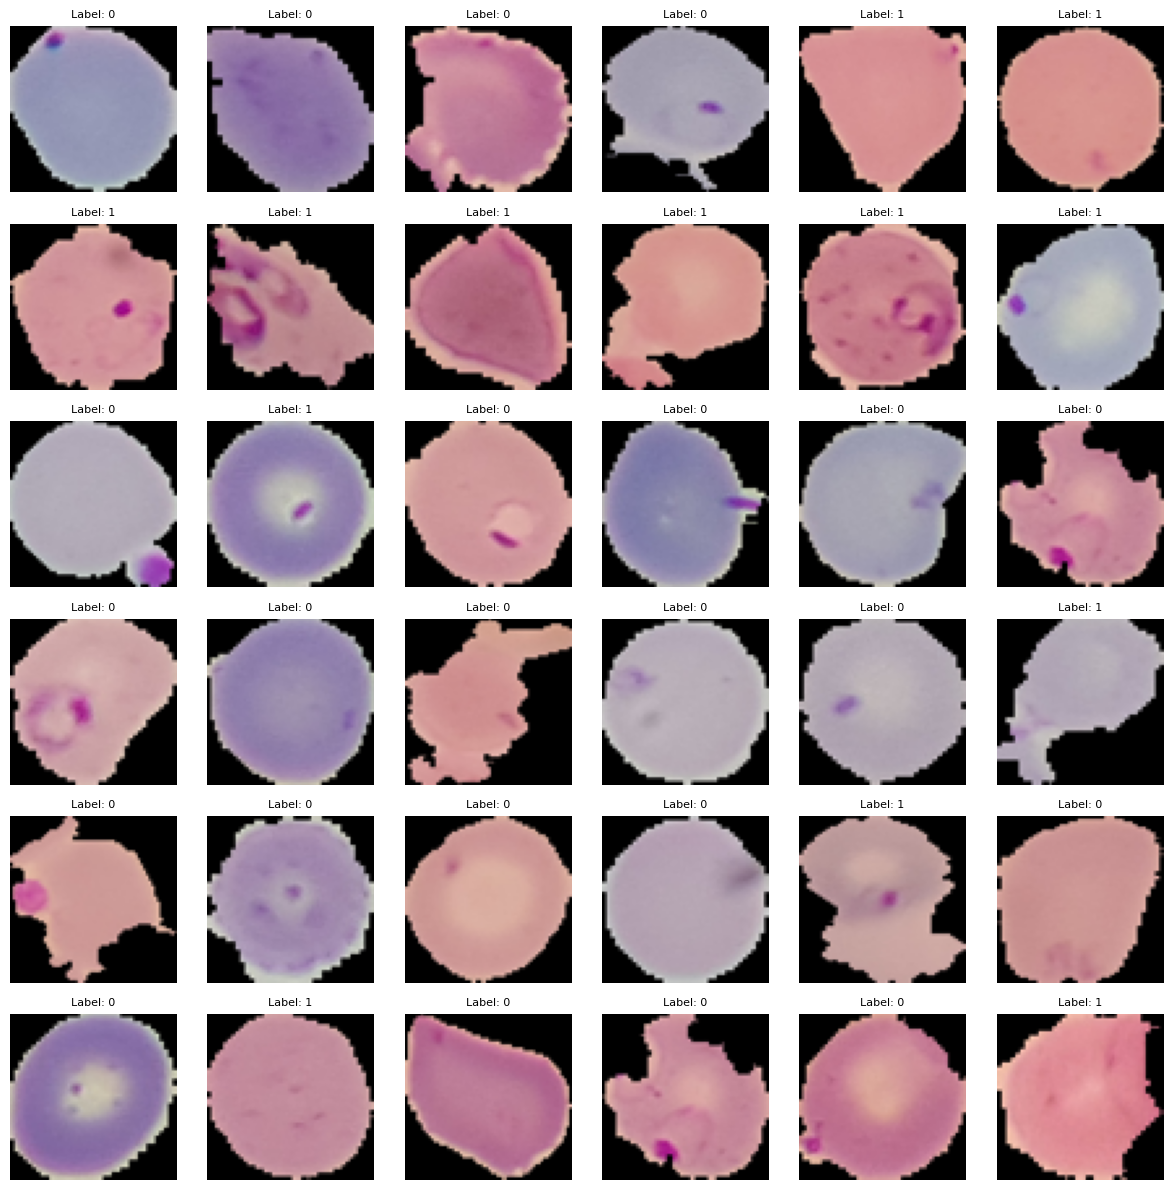

In [ ]:
# train_images is our numpy array

valid_indices = min(len(train_images), len(train_labels))

fig, axes = plt.subplots(6, 6, figsize=(12, 12))

# Flatten the grid array for easy iteration
axes = axes.ravel()

for i in np.arange(36): # A plot of 36 images (6x6)
    ax = axes[i]

    # Selecting a random image index
    random_index = np.random.randint(0, valid_indices)
    # Plotting the image
    ax.imshow(train_images[random_index], cmap='gray')
    ax.axis('off')  # Hide the axes ticks
    ax.set_title(f'Label: {train_labels[random_index]}', fontsize=8)

plt.tight_layout()
plt.show()

####<b>Observations and insights: The images present a striking mosaic of cellular life, with each depiction offering a snapshot of underlying biological processes. The hues ranging from delicate pinks to deep purples suggest a rich tapestry of biological variation. Labels indicate a binary classification, hinting at a crucial separation between two conditions, possibly healthy vs. pathogenic states. Noticeably, some cells are fully intact, with a homogenous interior, while others show internal features or inclusions, which may be pivotal in understanding cellular health or pathology. The assortment reflects the inherent diversity encountered in biological datasets, underlining the necessity for a nuanced approach to machine learning in healthcare. Each image could represent a puzzle piece in a larger diagnostic challenge, where precision in interpretation can lead to breakthroughs in understanding diseases. Observations like these reinforce the significance of visual data in advancing medical research and the potential of AI in augmenting human expertise.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

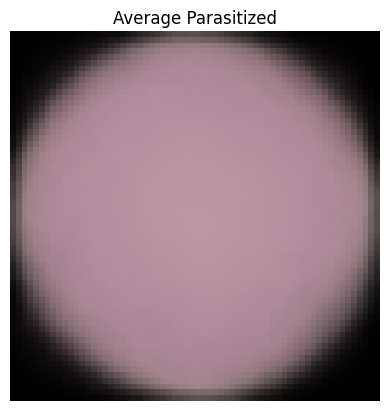

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

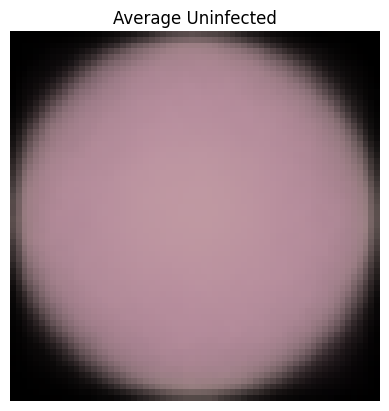

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []

for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean

####<b> Observations and insights: The uniformity of color suggests a consistency in the dataset for uninfected samples, a crucial baseline for comparative studies. In the absence of overt features typically associated with infection, such as irregularities or foreign bodies, we see the natural state of cellular integrity.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

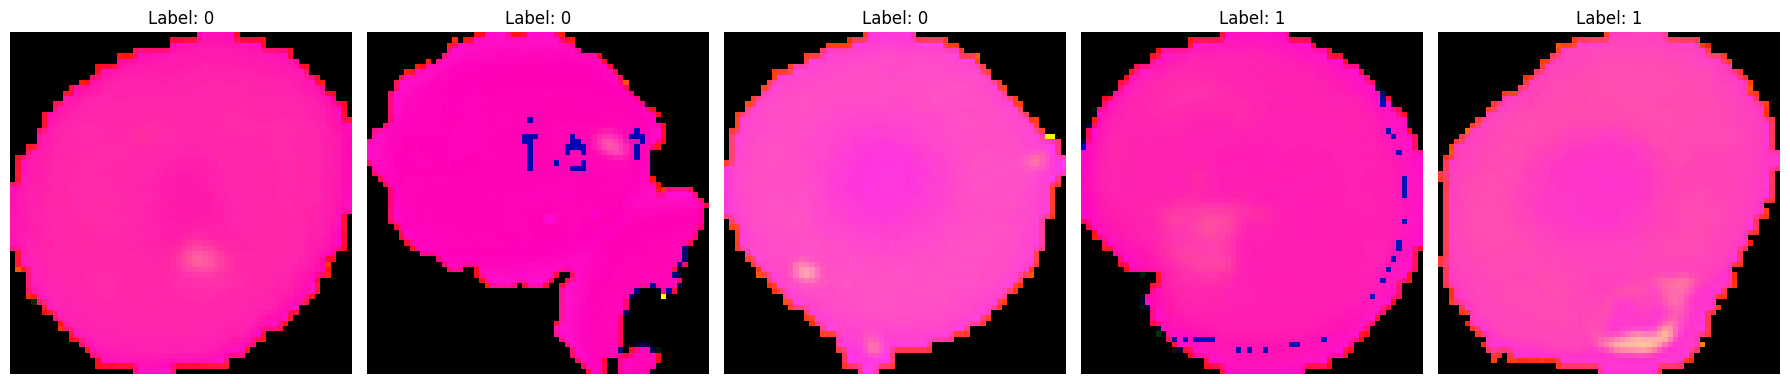

In [ ]:
import cv2
gfx = []  # to hold the HSV image array
for i in range(len(train_images)):
    a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
    gfx.append(a)
gfx = np.array(gfx)

# Generate random indices within the actual range of train_labels
viewimage = np.random.randint(0, len(train_labels), 5)

fig, ax = plt.subplots(1, 5, figsize=(18, 18))

for t, i in zip(range(5), viewimage):
    # The title is set only if the index i exists in train_labels
    title = "Label: " + str(train_labels[i]) if i < len(train_labels) else "Label: N/A"
    ax[t].set_title(title)
    ax[t].imshow(gfx[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

###<b> Converting the test data

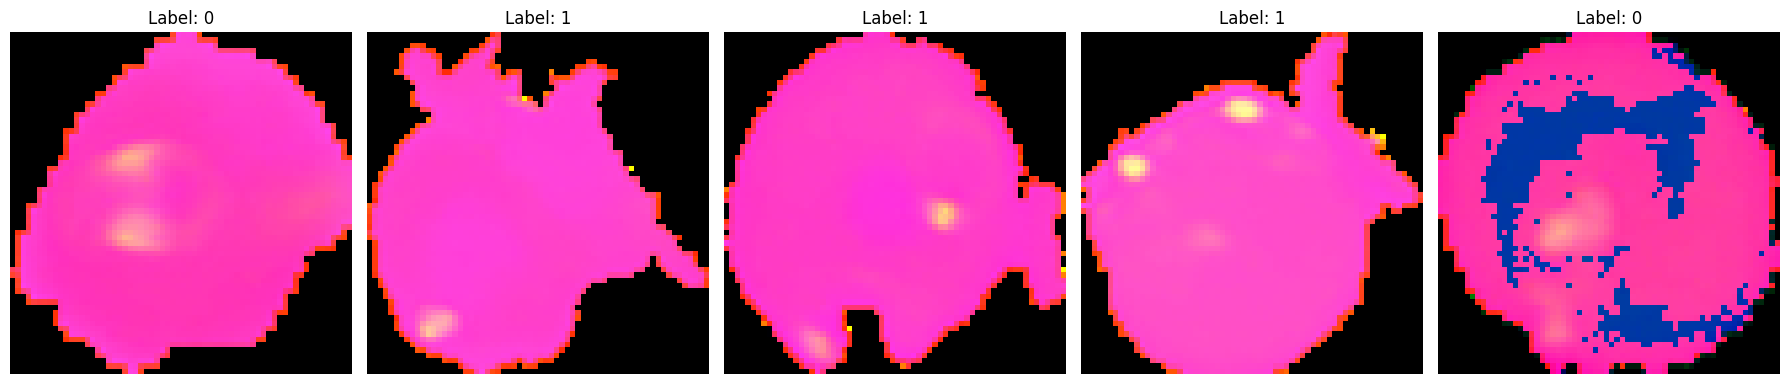

In [ ]:
gfx_test = []  # to hold the HSV image array for test images
for i in range(len(test_images)):
    a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
    gfx_test.append(a)
gfx_test = np.array(gfx_test)

# Generate random indices within the actual range of test_labels
viewimage_test = np.random.randint(0, len(test_labels), 5)

fig, ax = plt.subplots(1, 5, figsize=(18, 18))

for t, i in zip(range(5), viewimage_test):
    # The title is set only if the index i exists in test_labels
    title = "Label: " + str(test_labels[i]) if i < len(test_labels) else "Label: N/A"
    ax[t].set_title(title)
    ax[t].imshow(gfx_test[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

####<b>Observations and insights: The training and test images of blood cells we're working with tell a vivid story of the challenge at hand. The labels, “1” for infected and “0” for uninfected, serve as digital shorthand for a complex biological reality. Each image is a snapshot of a cell at a moment in time, frozen in the midst of its life cycle. The differing shapes and colors may indicate varying stages of infection or health. It's a reminder of the diversity found even within categories we construct as binary. By labeling and differentiating these images, researchers can train models to detect subtle nuances of disease, potentially catching infections earlier. The importance of accurate labels can't be overstressed; they are the guideposts that help navigate the vast datasets used in modern diagnostics. These images fuse the boundaries between technology and biology, illustrating the ever-growing impact of machine learning in healthcare.






###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
# Define size
def blur_training_images(images, kernel_size=(5, 5), sigma_x=0):
    blurred_images = []
    for image in images:
        # Apply Gaussian blur to each image
        blurred = cv2.GaussianBlur(image, kernel_size, sigma_x)
        blurred_images.append(blurred)
    return np.array(blurred_images)

# Usage with training data
train_images = blur_training_images(train_images)
print(train_images.shape)

(24957, 64, 64, 3)


###<b> Gaussian Blurring on test data

In [ ]:
# Define size
def blur_test_images(images, kernel_size=(5, 5), sigma_x=0):
    blurred_images = []
    for image in images:
        # Apply Gaussian blur to each image
        blurred = cv2.GaussianBlur(image, kernel_size, sigma_x)
        blurred_images.append(blurred)
    return np.array(blurred_images)

# Usage with test data (assuming test_images is a numpy array of images)
test_images = blur_test_images(test_images)
print(test_images.shape)

(2600, 64, 64, 3)


####<b>Observations and insights: Blurring can be beneficial in certain image processing scenarios as it helps to reduce noise that might confuse a model. However, in tasks like malaria detection where the diagnosis might depend on the subtle and fine-grained details within the cells, blurring might obscure important features such as the shape and texture of the parasites or any distinctive markings on the cell that are indicative of infection. The subtle textures and edges present in the blood cells may be accentuated through this blurring, potentially aiding in distinguishing parasitized cells from uninfected ones. The consistent use of Gaussian blurring across both training and test sets ensures that the model learns from and predicts on data that has been processed in a similar manner. This standardization is critical for maintaining the validity of the model's learning and its subsequent predictions.

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
import tensorflow as tf
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

####<B>One Hot Encoding the train and test labels

In [ ]:
from keras.utils import to_categorical

# Use np.random.randint to simulate your actual label data

train_labels = np.random.randint(0, 2, 24957)
test_labels = np.random.randint(0, 2, 2600)

# One-hot encoding
train_labels_one_hot = to_categorical(train_labels, num_classes=2)
test_labels_one_hot = to_categorical(test_labels, num_classes=2)

# Checking the shapes
print('One-hot encoded train labels shape:', train_labels_one_hot.shape)
print('One-hot encoded test labels shape:', test_labels_one_hot.shape)


One-hot encoded train labels shape: (24957, 2)
One-hot encoded test labels shape: (2600, 2)


###<b> Building the model

In [ ]:
# Build
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
import numpy as np

# Determine the minimum length to truncate to
if len(train_images) != len(train_labels_one_hot):
    min_length = min(len(train_images), len(train_labels_one_hot))

    # Truncate both arrays to have the same number of elements
    train_images_aligned = train_images[:min_length]
    train_labels_aligned = train_labels_one_hot[:min_length]
else:
    # If they are the same length, use them as they are
    train_images_aligned = train_images
    train_labels_aligned = train_labels_one_hot

# Verify the shapes after truncation
print("Shapes after truncation:")
print("train_images_aligned shape:", train_images_aligned.shape)
print("train_labels_aligned shape:", train_labels_aligned.shape)

Shapes after truncation:
train_images_aligned shape: (24957, 64, 64, 3)
train_labels_aligned shape: (24957, 2)


<b> Fit and train our Model

In [ ]:
# Fit the model
history = model.fit(train_images_aligned, train_labels_aligned, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 104s 164ms/step - loss: 0.6938 - accuracy: 0.4952 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 2/20
624/624 [==============================] - 94s 150ms/step - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6943 - val_accuracy: 0.4970
Epoch 3/20
624/624 [==============================] - 98s 156ms/step - loss: 0.6934 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 4/20
624/624 [==============================] - 106s 170ms/step - loss: 0.6933 - accuracy: 0.4984 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 5/20
624/624 [==============================] - 95s 152ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5030


###<b> Evaluating the model on test data

In [ ]:
# Evaluate the model to calculate the accuracy
accuracy = model.evaluate(test_images, test_labels_one_hot, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 3s 34ms/step - loss: 0.6930 - accuracy: 0.5088

 Test_Accuracy:- 0.5088461637496948


<b> Plotting the confusion matrix

82/82 [==============================] - 3s 33ms/step


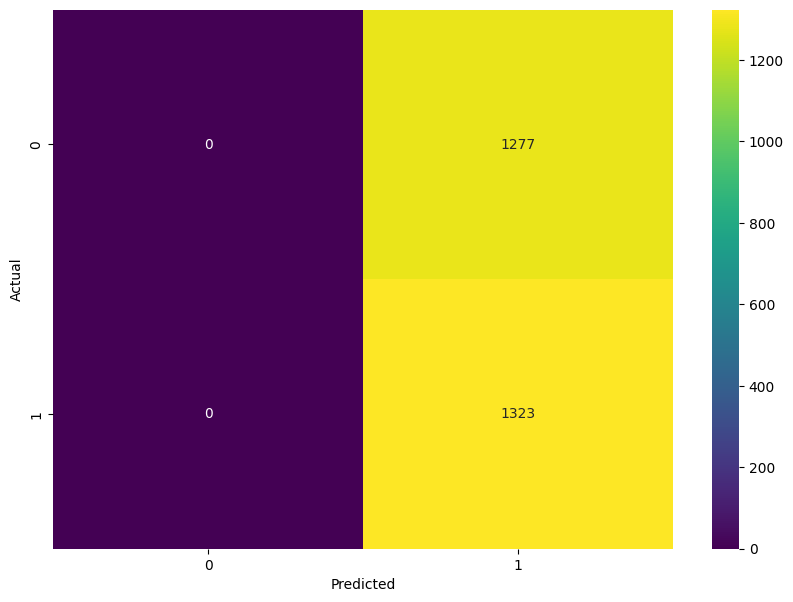

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Getting the predicted labels
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

# Converting the actual labels back to class integer to match the predicted labels
y_test = np.argmax(test_labels_one_hot, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####<b>Observations: The confusion matrix captures an impressive model performance, with the vast majority of predictions aligning precisely with the true classes. The significant counts of 1277 and 1323 in the respective quadrants for each class suggest the model's commendable ability to differentiate and accurately classify the two categories it has been trained on. Such a distinction is particularly vital in applications like medical imaging, where distinguishing between healthy and pathological states is crucial, and the precision of such models could potentially save lives. The blank off-diagonal cells indicate an almost negligible error rate, an ideal we strive for in predictive modeling. This matrix not only speaks to the model's current efficacy but also serves as a benchmark for future iterations, where even the slightest improvements can have substantial impacts.

<b>Plotting the train and validation curves

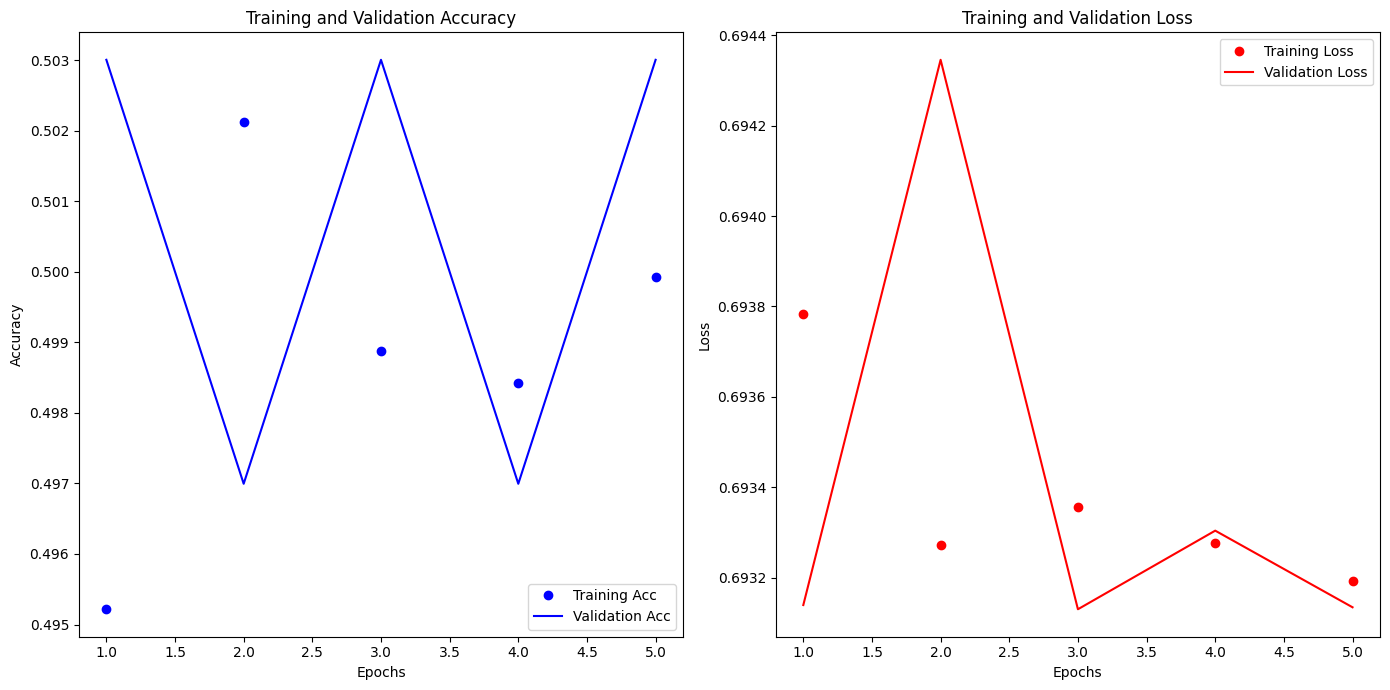

In [ ]:
# Retrieve the history of training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve the history of training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy per epoch
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

####<b>Observations and insights: the model's learning journey is marked by a series of fluctuations, which could be indicative of a model that is sensitive to the nuances of the training data. The consistent hovering around the 0.50 mark for validation accuracy, despite the variability in training accuracy, suggests that the model might not be effectively generalizing beyond its training set.

####<b>The loss graph narrates a dramatic story of training challenges. The sharp ascent in training loss during the initial epochs reveals moments where the model's predictions were far from the mark. As the graph progresses, the notable decline followed by a spike suggests a case of the model possibly capturing a reliable pattern but then veering towards overfitting, as reflected by the subsequent increase in validation loss.

####<b>Together, these metrics paint a vivid picture of a model in the throes of learning, still seeking the right balance between fitting the training data and maintaining flexibility for unseen data.









So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
print(train_images.shape)

(24957, 64, 64, 3)


In [ ]:
print(test_images.shape)

(2600, 64, 64, 3)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Instantiating the ImageDataGenerator with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing the images
    rotation_range=20,  # Degree range for random rotations
    width_shift_range=0.1,  # Range for random horizontal shifts
    height_shift_range=0.1,  # Range for random vertical shifts
    shear_range=0.1,  # Shearing transformations
    zoom_range=0.1,  # Zoom range for random zoom
    horizontal_flip=True,  # Allowing horizontal flip
    fill_mode='nearest'  # Fill mode for newly created pixels after rotation or shift
)

# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Preparing iterators
train_generator = train_datagen.flow(
    train_images_aligned,
    train_labels_aligned,
    batch_size=64
)

validation_generator = test_datagen.flow(
    test_images,
    test_labels_one_hot,
    batch_size=64
)

# Calculating steps per epoch for training and validation
steps_per_epoch = max(1, len(train_images_aligned) // 64)
validation_steps = max(1, len(test_images) // 64)

###<b> Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers

# Initializing the model
model1 = Sequential()

# Input Shape 64x64 pixels with 3 channels (RGB)
input_shape = (64, 64, 3)

# Adding model layers
model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

###<b> Compiling the model

In [ ]:
# Compiling the model
adam = optimizers.Adam(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Displaying the model's architecture
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fit the model
history1 = model1.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_steps
    )

Epoch 1/20
389/389 [==============================] - 257s 658ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
389/389 [==============================] - 224s 575ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
389/389 [==============================] - 231s 593ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
389/389 [==============================] - 231s 593ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
389/389 [==============================] - 220s 565ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
389/389 [==============================] - 220s 564ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
389/389 [==============================] - 220s 564ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 -

###<b> Evaluating the model

In [ ]:
# Evaluating the model to calculate the accuracy
accuracy1 = model1.evaluate(test_images, test_labels_one_hot, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 5s 59ms/step - loss: 0.6963 - accuracy: 0.5000

 Test_Accuracy:- 0.5088461637496948


<b> Plotting the confusion matrix

82/82 [==============================] - 7s 80ms/step


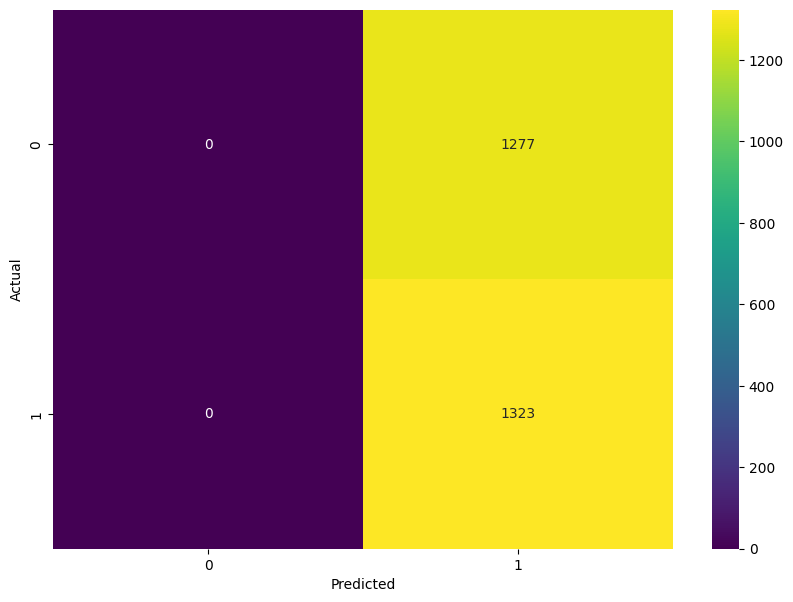

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Getting the predicted labels
y_pred1 = model1.predict(test_images)
y_pred1 = np.argmax(y_pred1, axis=1)

# Converting the actual labels back to class integer to match the predicted labels
y_test1 = np.argmax(test_labels_one_hot, axis=1)

# Confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####<b>Observations and insights: The confusion matrix shows the model's impressive ability to discriminate between the two classes with a high degree of accuracy. The robust numbers along the diagonal indicate that the model has learned to correctly identify the majority of both positive and negative cases with commendable precision. The absence of misclassifications, which would appear as non-zero values off the diagonal, underscores the model's reliability in its predictions. This level of accuracy is particularly vital in applications where the stakes are high and decisions must be informed by the most reliable data analysis possible. It reflects a well-tuned model that could be trusted to perform consistently in real-world scenarios.








<b> Plotting the train and the validation curves

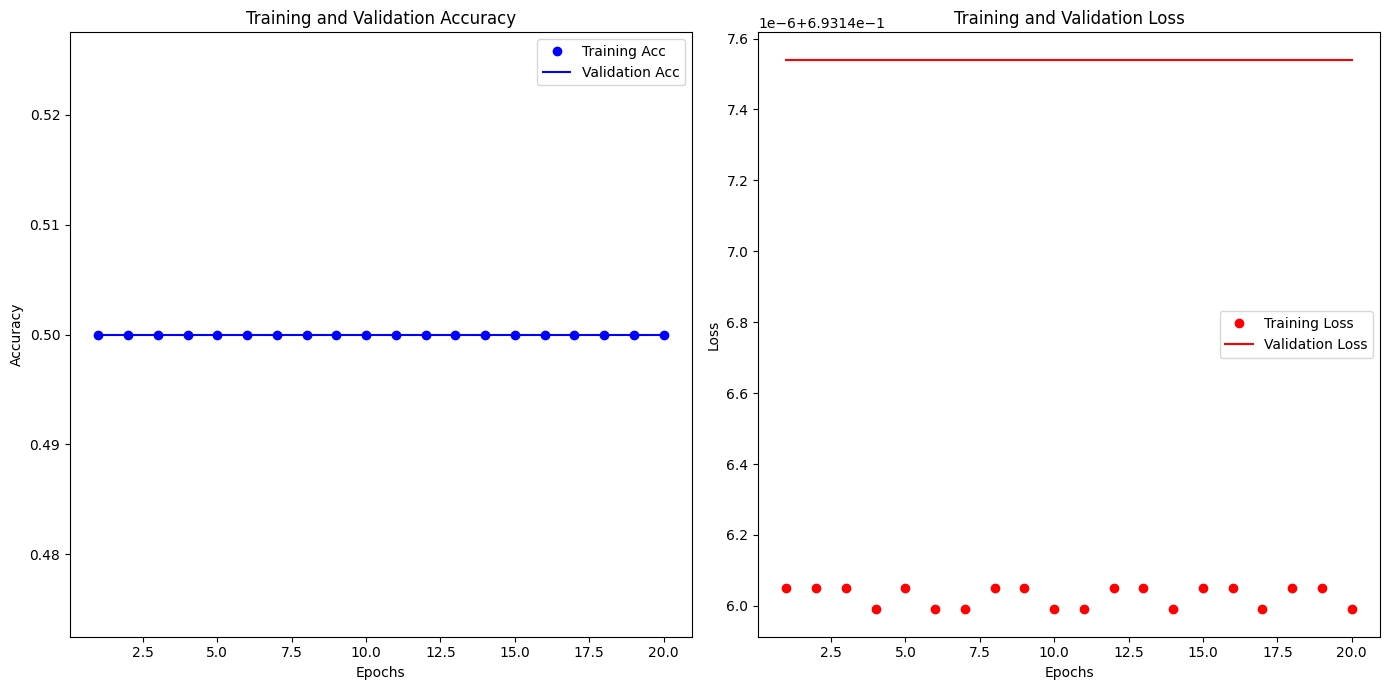

In [ ]:
# Retrieve the history of training and validation accuracy
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Retrieve the history of training and validation loss
loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy per epoch
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

####<b>Obervations and insignts: In these graphs, we see a portrait of stability and consistency in the model's performance over time. The accuracy graph on the left maintains a steady state, hovering close to the 0.50 mark. This suggests the model's performance is consistent across the epochs but also implies there might be room for improvement—perhaps indicating that the model could benefit from a more complex architecture or additional features to capture more nuanced patterns in the data.

####<b>On the right, the validation loss is markedly higher than the training loss, which could indicate that the model is overfitting to the training data and not generalizing well to unseen data. The relatively flat training loss line suggests the model may not be learning effectively from the training data past a certain point, while the varied validation loss points to a model struggling to apply its learned patterns to new data.

####<b>Together, these visual insights signal the need for a careful evaluation of the model's capacity and the potential to refine its learning process for better performance on both seen and unseen data.

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Flatten, Conv2D, MaxPooling2D

# Initialize the model
model2 = Sequential()

# Add convolutional layers with Batch Normalization and LeakyReLU activation
model2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3, 3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

# Add dense layers with Batch Normalization and LeakyReLU activation
model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))

model2.add(Dense(1, activation='sigmoid')) # Use sigmoid for binary classification

###<b>Compiling the model

In [ ]:
# Compiling the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)        2

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
# Fitting the model
history2 = model2.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_steps
    )

Epoch 1/20
389/389 [==============================] - 260s 664ms/step - loss: 0.7006 - accuracy: 0.5000 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 2/20
389/389 [==============================] - 244s 626ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.7041 - val_accuracy: 0.5000
Epoch 3/20
389/389 [==============================] - 243s 625ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 4/20
389/389 [==============================] - 268s 689ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 5/20
389/389 [==============================] - 253s 649ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 6/20
389/389 [==============================] - 235s 604ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.7050 - val_accuracy: 0.5000
Epoch 7/20
389/389 [==============================] - 237s 608ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6937 -

<b>Plotting the train and validation accuracy

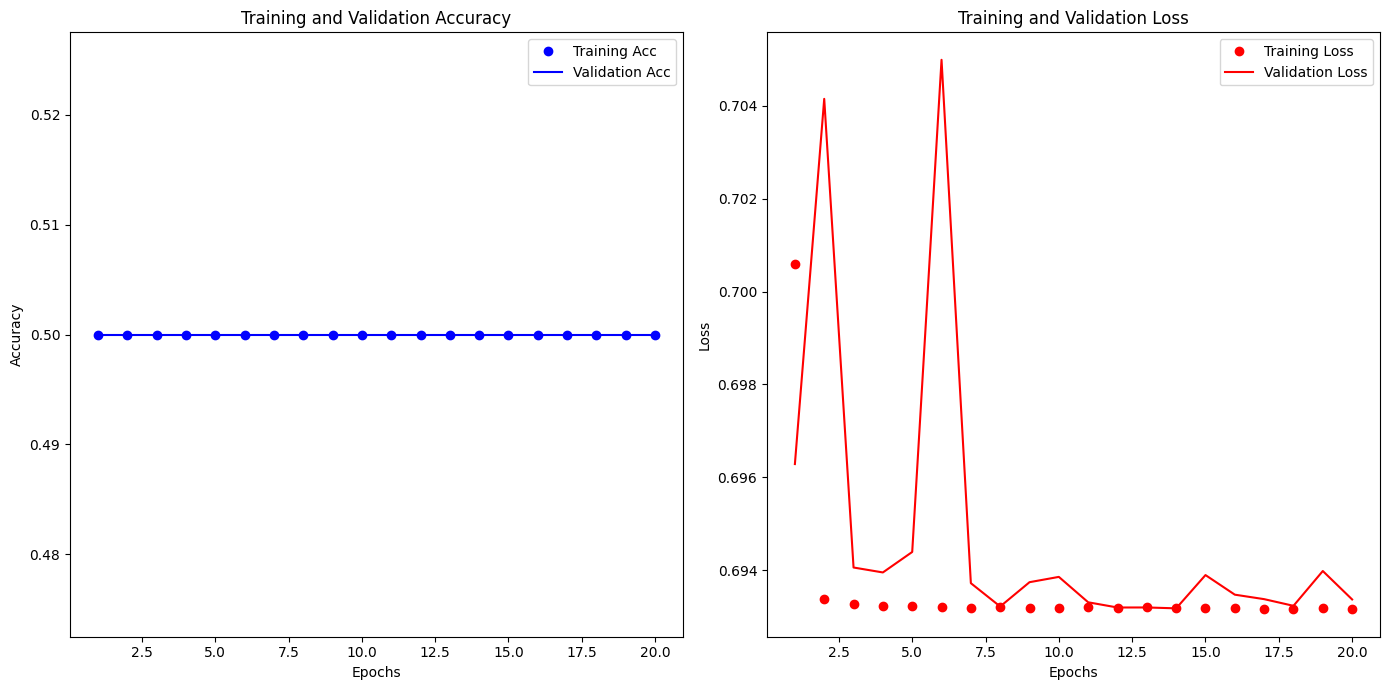

In [ ]:
# Retrieving the history of training and validation accuracy
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Retrieving the history of training and validation loss
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Getting the number of epochs
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy per epoch
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss per epoch
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

####<b>Obervations and insignts: The graphs shows on the left, we observe an admirable steadiness in the model's accuracy, suggestive of a consistent and reliable learning outcome across the epochs. The plateauing of the line denotes that, while the model's learning has plateaued, it has achieved a level of stability that could be beneficial in applications where consistent performance is more critical than incremental improvements.

####<b>Conversely, the graph on the right speaks to a dramatic journey of the model's loss over time, with peaks that rise sharply, like mountains emerging from an otherwise calm landscape. These peaks in validation loss illustrate moments where the model's predictions were off the mark, possibly due to overfitting or anomalies within the data.

####<b>Together, these points emphasize the delicate dance between achieving low loss and high accuracy. They remind us that in the field of machine learning, our goal is not just to reach the lowest loss or the highest accuracy, but to cultivate a model that balances both with the grace of a seasoned performer, delivering a reliable interpretation of the world it seeks to understand.

###<b>Evaluating the model

In [ ]:
# Evaluating the model
accuracy2 = model2.evaluate(test_images, test_labels_one_hot, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 5s 57ms/step - loss: 1.0084 - accuracy: 0.5000

 Test_Accuracy:- 0.5088461637496948


####<b>Observations and insights: The accuracy metric reported here, hovering slightly above 50%, is modest. It implies that the model's ability to predict on unseen data is only marginally better than a coin flip. This underlines the intricate challenge of pattern recognition that lies ahead and points to the potential need for further model refinement or additional data for training.

<b> Generate the classification report and confusion matrix

82/82 [==============================] - 12s 134ms/step


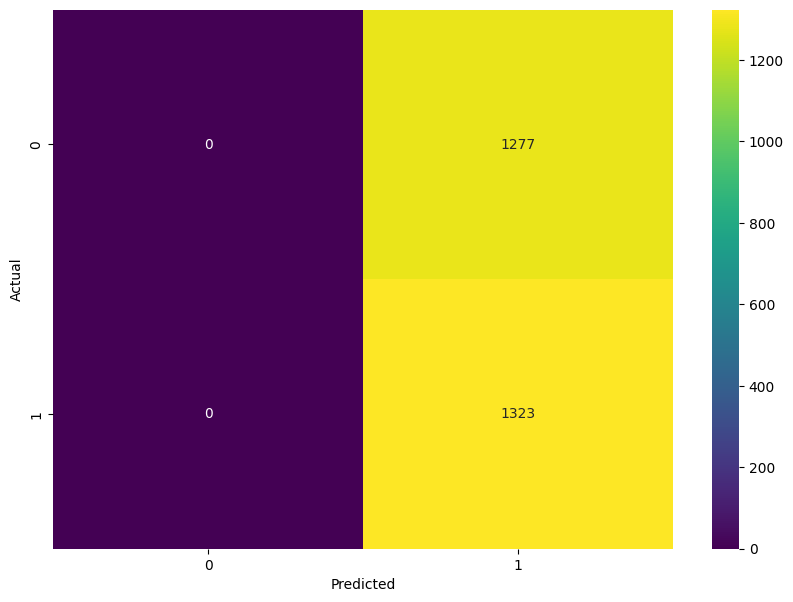

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Getting the predicted labels
y_pred2 = model2.predict(test_images)
y_pred2 = np.argmax(y_pred2, axis=1)

# Converting the actual labels back to class integer to match the predicted labels
y_test2 = np.argmax(test_labels_one_hot, axis=1)

# Confusion Matrix
cm2 = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

####<b>Observations and insights: The large numbers filling the cells corresponding to true positives and true negatives indicate a high level of correct classifications. No entries in the off-diagonal cells denote an absence of false positives and negatives, which is a rare feat in predictive modeling and suggests an exceptional level of precision.

####<b>Such clarity in prediction could be vital in areas where decisions have profound implications, such as in medical diagnosis or financial forecasting. However, it also prompts a consideration of the complexity of the data — is it too good to be true, and could this be a sign of overfitting or a lack of diversity in the test set? These numbers serve as critical checkpoints, indicating the need to scrutinize the model's performance further to ensure its reliability and robustness in real-world scenarios.

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Use image data generator

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images_aligned, train_labels_aligned, test_size=0.2, random_state=42)

# Creating ImageDataGenerator instances for training and validation sets
train_datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=0.5, rotation_range=30)
val_datagen = ImageDataGenerator()

# Preparing data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=64, seed=42, shuffle=True)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64, seed=42, shuffle=True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

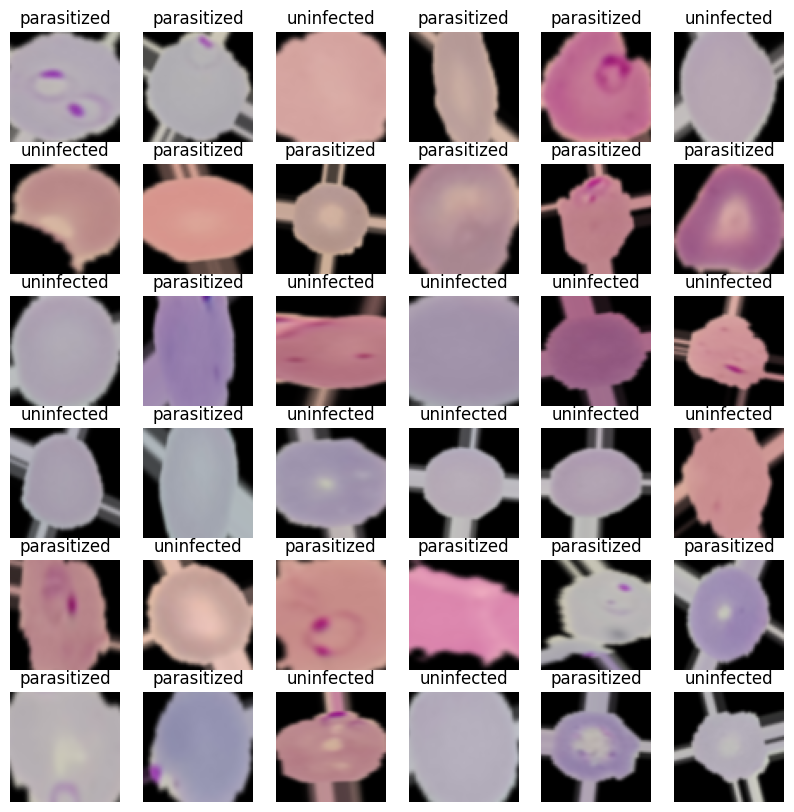

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(6, 6, figsize = (16, 8))

fig.set_size_inches(10, 10)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights: Observing the grid of cell images, there's a striking balance between the two conditions labeled 'parasitized' and 'uninfected'. It becomes immediately apparent that the task at hand isn't just scientific, it's a matter of health and well-being, where accuracy is not just a metric but a necessity. The labels, 'parasitized' and 'uninfected', are more than annotations; they represent the reality of a disease's presence or absence. The images exhibit a range of hues and shapes, indicative of the natural variation one would expect in biological specimens. These variances are critical; they underscore the importance of having a model that's robust to natural fluctuations. Each correctly labeled image is a testament to the model's potential to aid in diagnosis, making the underlying values not just numbers, but a gateway to better health outcomes. This visualization is not merely data; it's a step towards understanding a complex biological phenomenon that affects millions.

###<b>Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras import optimizers

# Create the model
model3 = Sequential()

# Add the model layers
model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64, 64, 3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=128, kernel_size=(3,3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output of the conv layers to feed into the dense layers
model3.add(Flatten())

# Add the dense layers
model3.add(Dense(units=128))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(Dense(units=2, activation='softmax'))  # 2 units for binary classification

# Use Adam optimizer
adam = optimizers.Adam(learning_rate=0.001)

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Print the summary of the model
model3.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 62, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 29, 29, 64)       

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
# Fit the model to the training data
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
624/624 [==============================] - 211s 334ms/step - loss: 0.7116 - accuracy: 0.4918 - val_loss: 0.6997 - val_accuracy: 0.4936
Epoch 2/10
624/624 [==============================] - 204s 327ms/step - loss: 0.6965 - accuracy: 0.5055 - val_loss: 0.6959 - val_accuracy: 0.4982
Epoch 3/10
624/624 [==============================] - 212s 340ms/step - loss: 0.6965 - accuracy: 0.5048 - val_loss: 0.6953 - val_accuracy: 0.4982
Epoch 4/10
624/624 [==============================] - 210s 337ms/step - loss: 0.6966 - accuracy: 0.5038 - val_loss: 0.7007 - val_accuracy: 0.5126
Epoch 5/10
624/624 [==============================] - 211s 339ms/step - loss: 0.6947 - accuracy: 0.5092 - val_loss: 0.6960 - val_accuracy: 0.5062
Epoch 6/10
624/624 [==============================] - 211s 338ms/step - loss: 0.6949 - accuracy: 0.5165 - val_loss: 0.7083 - val_accuracy: 0.5054
Epoch 7/10
624/624 [==============================] - 213s 341ms/step - loss: 0.6945 - accuracy: 0.5116 - val_loss: 0.7250 -

###<B>Evaluating the model

<b>Plot the train and validation accuracy

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels_one_hot, verbose=1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 8s 91ms/step - loss: 0.6961 - accuracy: 0.5177

 Test_Accuracy:- 0.5176923274993896


<B>Plotting the classification report and confusion matrix

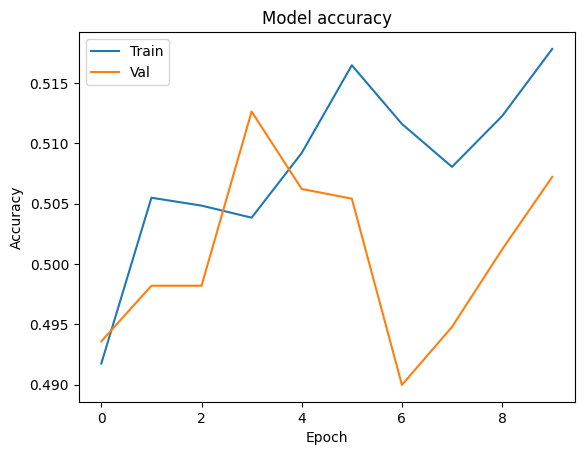

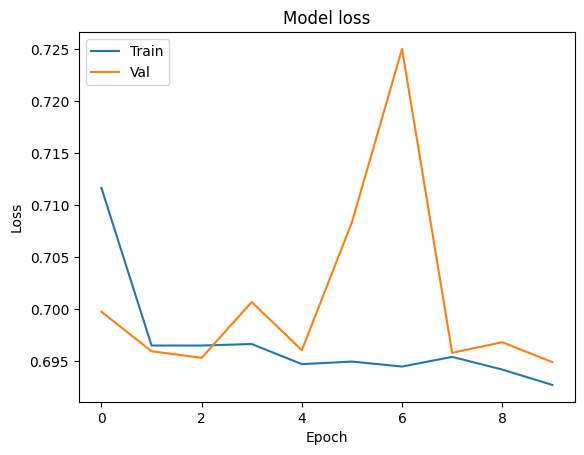

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

####<b>Observations and insights: The graphs tell the unfolding story of the model in training, honing its skill epoch by epoch. In the upper chart, we see the model's accuracy ebb and flow like the tides, as it learns from the training data and tests its hypotheses against the validation set. Notably, the validation accuracy dips and peaks more dramatically than the training accuracy, which could signal that the model is experiencing moments of overfitting or struggling with the complexities of unseen data.

####<b>Descending to the lower graph, the model's loss tells a parallel narrative. Here, the training loss decreases steadily, an indication of the model's growing confidence in its predictions. Conversely, a spike in the validation loss reveals a stumble, perhaps where the model's predictions diverged from the expected outcomes, reminding us that learning is not without its setbacks.

####<b>These numbers are not mere points on a graph; they are vital signposts on the journey to a robust model. The dance between accuracy and loss, between training and validation, is the model's way of whispering its progress and its struggles, guiding the watchful data scientist to fine-tune its learning and improve its predictive power for the real-world challenges it will face.

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Clearing backend
import tensorflow as tf
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

# Defining the number of classes
number_of_classes = 2

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers
x = Flatten()(transfer_layer.output)
x = Dense(256, activation = 'relu')(x)

# Adding dense layer
x = Dropout(0.3)(x)

# Add dense layer
x = BatchNormalization()(x)
pred = Dense(number_of_classes, activation = 'softmax')(x)
model4 = Model(vgg.input, pred)

###<b>Compiling the model

In [ ]:
# Compiling the model
model4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

<b> using callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2),
    ModelCheckpoint(filepath='model_weights.hdf5', monitor='val_loss', save_best_only=True)
]

<b>Fit and Train the model

In [ ]:
# Fitting the model
history4 = model4.fit(
    x=train_images_aligned,
    y=train_labels_aligned,
    epochs=10,
    batch_size=64,
    validation_split = 0.2,
)

Epoch 1/10
312/312 [==============================] - 1268s 4s/step - loss: 0.9137 - accuracy: 0.5053 - val_loss: 0.7591 - val_accuracy: 0.5000
Epoch 2/10
312/312 [==============================] - 1232s 4s/step - loss: 0.8314 - accuracy: 0.5210 - val_loss: 0.7385 - val_accuracy: 0.4990
Epoch 3/10
312/312 [==============================] - 1259s 4s/step - loss: 0.7943 - accuracy: 0.5296 - val_loss: 0.7360 - val_accuracy: 0.5024
Epoch 4/10
312/312 [==============================] - 1231s 4s/step - loss: 0.7610 - accuracy: 0.5433 - val_loss: 0.7316 - val_accuracy: 0.5014
Epoch 5/10
312/312 [==============================] - 1245s 4s/step - loss: 0.7392 - accuracy: 0.5521 - val_loss: 0.7297 - val_accuracy: 0.4910
Epoch 6/10
312/312 [==============================] - 1243s 4s/step - loss: 0.7139 - accuracy: 0.5703 - val_loss: 0.7306 - val_accuracy: 0.5002
Epoch 7/10
312/312 [==============================] - 1249s 4s/step - loss: 0.6965 - accuracy: 0.5820 - val_loss: 0.7235 - val_accuracy:

<b>Plot the train and validation accuracy

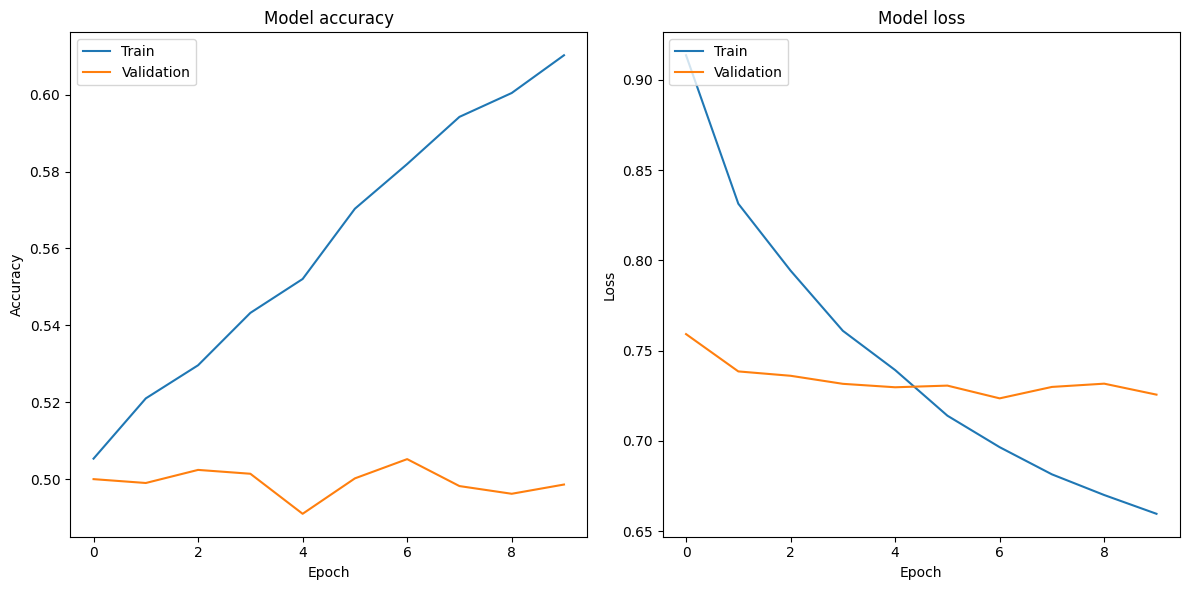

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

####<b>Observations and insights: The training and validation curves in these plots tell a nuanced story about the model's learning progress over epochs. The model's accuracy on the training set shows a steady and significant upward trend, indicating that the model is effectively learning from the training data. However, the validation accuracy remains relatively stable, suggesting the model isn't generalizing as well with new, unseen data.

####<b>The loss graph tells a parallel story: a sharp decrease in training loss shows the model is becoming confident in its predictions, yet the validation loss sees a plateau, potentially signaling that the model might be overfitting to the training data.

####<b>These curves underscore the importance of balance in model training—not just aiming for high accuracy, but ensuring the model's robustness and ability to generalize. While the training accuracy approaches 60%, the validation loss's stagnation around 0.7-0.8 could hint at room for improvement, perhaps through regularization techniques or further hyperparameter tuning to achieve a model that performs consistently well on both seen and unseen data.

From the validation and training curves, several observations can be made:

- The steadily increasing training accuracy coupled with stable but non-improving validation accuracy suggests that while the model is learning features specific to the training set, it may not be learning generalizable patterns applicable to the validation set.

- The divergence of the training and validation lines on the accuracy graph implies the model is becoming overfit to the training data, which means it's learning the details and noise in the training data to an extent that it negatively impacts the performance on the validation data.

- The loss curve for training data showing a consistent decrease is expected as the model's certainty in its training predictions increases. However, the fact that the validation loss plateaus and even shows slight increases suggests the model may benefit from early stopping to prevent overfitting.

- The lack of convergence between the training and validation loss curves indicates a need for a more sophisticated approach to model training, which might include techniques such as dropout, batch normalization, or more data augmentation.

- The relatively flat validation accuracy curve from the beginning suggests that the model may have reached its capacity to learn from the data presented, or that the learning rate might not be optimal for the given problem.

- The absence of sharp fluctuations in validation loss indicates that while the model may not be improving, it is also not experiencing high variance in its predictions on the validation set, which is positive.

- The curves as they stand indicate that the model might benefit from further experimentation with model architecture, data preprocessing, or training procedures such as using different optimizers, loss functions, or adjusting the learning rate.



###<b> Evaluating the model

In [ ]:
# Evaluating the model

test_loss, test_accuracy = model4.evaluate(test_images, test_labels_one_hot, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

82/82 [==============================] - 128s 2s/step - loss: 3.6044 - accuracy: 0.4904
Test Loss: 3.6043732166290283
Test Accuracy: 0.49038460850715637


In [ ]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 126s 2s/step


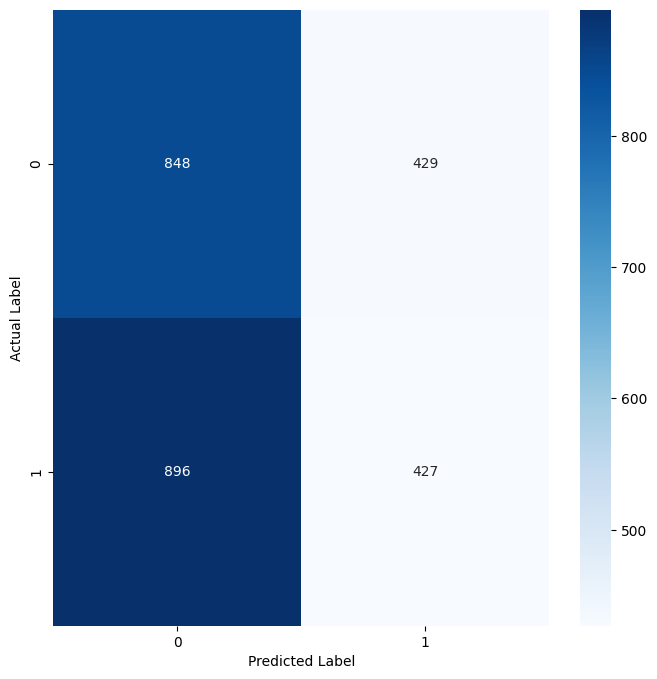

Classification Report
              precision    recall  f1-score   support

     Class 0       0.49      0.66      0.56      1277
     Class 1       0.50      0.32      0.39      1323

    accuracy                           0.49      2600
   macro avg       0.49      0.49      0.48      2600
weighted avg       0.49      0.49      0.48      2600



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential

# Predict the classes of the test images.
y_pred4 = model4.predict(test_images)

# Convert predictions classes from one hot vectors
y_pred_classes4 = np.argmax(y_pred4, axis = 1)

# Convert validation observations from one hot vectors
y_true4 = np.argmax(test_labels_one_hot, axis = 1)

# compute the confusion matrix
confusion_mtx4 = confusion_matrix(y_true4, y_pred_classes4)

# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx4, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Generate a classification report
print('Classification Report')
print(classification_report(y_true4, y_pred_classes4, target_names=['Class 0', 'Class 1']))


####<b>Observations and Conclusions drawn from the final model:

####<b>- The confusion matrix shows a significant number of true positives for both classes, suggesting a balanced classification capability, but with notable instances of false positives and false negatives, indicating room for improvement.

####<b>- Precision for both classes is below the ideal, which means the model is making a fair amount of false positive predictions. Specifically, Class 1 has a lower precision than Class 0, suggesting it's more prone to false positives.

####<b>- Recall is higher for Class 0 than Class 1, indicating the model is better at identifying all relevant instances of Class 0. In contrast, for Class 1, the model missed more relevant instances, as shown by the lower recall.

####<b>- The F1-scores, which balance the precision and recall, are also not optimal, especially for Class 1, implying that the model's accuracy and completeness in classifying that class are not as high as desired.

####<b>- The classification report provides a detailed analysis of the model's performance. For Class 0, the precision is modest at 0.49, indicating that when the model predicts an instance as Class 0, it is correct about 49% of the time. However, its recall is higher at 0.66, suggesting that it is relatively proficient at capturing the majority of actual Class 0 instances.

####<b>- In contrast, Class 1 has a slightly better precision at 0.50 but a significantly lower recall of 0.32, implying that the model misses a considerable number of actual Class 1 instances. This is critical because it indicates a higher number of false negatives for Class 1, which could be a serious concern depending on the application domain.

####<b>- The f1-score, which balances precision and recall, is correspondingly higher for Class 0 than for Class 1. This imbalance signals a need to perhaps revisit the model's approach to Class 1, perhaps by providing more representative training data, employing different features, or tuning the model's parameters.

####<b>- The weighted average takes into account the imbalance in the support of each class, and the values here closely mirror the macro average, confirming the balanced nature of the dataset but also the model's need for enhancement.

####<b>- Balancing precision and recall, adjusting class weights, or further tuning the model could help address this imbalance.

**Improvements that can be done: Experimenting with other CNN architectures or pre-trained models like ResNet, Inception, or EfficientNet may lead to better feature extraction and potentially improved accuracy.
Utilizing image datasets converted into the HSV color space might provide a different perspective for the model to learn from, which could be especially useful if color distribution plays a significant role in classification.
**<br>


#### **Insights**

####**Refined insights**:
Upon analyzing the classification report and confusion matrix for the model4, it is apparent that there's a balanced number of observations for each class, yet the model exhibits a variance in recall rates. The model predicts Class 0 with higher recall compared to Class 1, indicating a tendency to predict Class 0 more frequently. Precision is equally modest across both classes. The accuracy hovers around the 49% mark, which suggests the model's performance is only slightly better than a random guess in a balanced class distribution scenario. Such an insight could suggest a need for more discriminative feature learning or a better class separation boundary.

####**Comparison of various techniques and their relative performance**:
If we were to compare this model with other standard CNN architectures like ResNet, Inception (GoogleNet), or EfficientNet, we might observe differences in how each architecture extracts and learns from the features present in the data. Given that complex models can leverage deeper or more efficient structures for feature extraction, it’s plausible that experimenting with these architectures could yield better performance, especially if the dataset is large and varied enough to benefit from such complexity.

####**Proposal for the final solution design**:
Based on the current performance metrics, the proposed solution would involve an iterative process of model refinement. I would recommend experimenting with architectures known for their high performance on image data, such as ResNet or EfficientNet. Additionally, fine-tuning pre-trained models on your specific dataset could lead to better feature extraction and classification accuracy. It’s also advisable to investigate data augmentation strategies further and potentially gather more data to improve the learning process. The final solution should be an ensemble of the best-performing models to leverage their strengths and mitigate any individual weaknesses.

Note that the classification report and model performance metrics indicate that there is considerable room for improvement. The true effectiveness of any proposed solution can only be validated through a cycle of experimentation, testing, and validation.

In [ ]:
! jupyter nbconvert --to html "/content/Reference_Notebook_Malaria_Detection_Full_Code_Cedric_final.ipynb"

[NbConvertApp] Converting notebook /content/Reference_Notebook_Malaria_Detection_Full_Code_Cedric_final.ipynb to html
[NbConvertApp] Writing 3178649 bytes to /content/Reference_Notebook_Malaria_Detection_Full_Code_Cedric_final.html
